
# Project: Investigate and Analyze TMDb-movies Dataset from Kaggle

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we will be using the movies database to take a look at the overall information about the film industry throughout the years and probably take a more deep-dive into the details and insights of what contributed to the success of a film, is there a difference in the length of a movie in the 90s and in the 2k era, etc ... We should be able to explore more during our analysis and findings among the data

## Questions for Analysis
In this project, we will explore some insights from the movie industry over the years. There are 2 major questions that I wish to figure out by going through this dataset

#### 1. Which director made the highest-vote movie and was the movie had a good revenue?
#### 2. How genres make an impact on the polularity of a movie?

In [12]:
# import some necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set the magic word for inline plotting
%matplotlib inline

# Load the dataset
df = pd.read_csv('tmdb-movies.csv')

# Display some initial rows from the dataset
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

<a id='wrangling'></a>
## Data Wrangling & Data Cleaning

> **Short Description**: In this section of the report, data will be loaded, check for cleanliness, and then trim and clean for analysis purpose. We will be checking for missing values, duplicate rows, and other data quality issues.


### Number of Rows & Number of Columns

In [3]:
df.shape

(10866, 21)

In [4]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 10866
Number of Columns 21


## Checking general information in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

From the output above, we can see that there are potentially some missing values or could some duplicate ones. 
We will need to clean the data accordingly to make sure that our dataset is fresh-and-clean

In [7]:
# check for duplication
dup_df=df.duplicated().any()
print("Are there any duplicate values?",dup_df)

Are there any duplicate values? True


In [8]:
# drop duplicate values
df=df.drop_duplicates()
df

id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                         Furious 7   
...                             ...   
10861            The Endless Summer   
10862                    Grand Prix   
10863           Beregis Avtomobilya   
10864        What's Up, Tiger Lily?   
10865      Manos: The Hands of Fate   

                                                    cast  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1      Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2      Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3      Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4      Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
...                                                  ...   
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...   

                                                homepage            director  \
0                          http://www.jurassicworld.com/     Colin Trevorrow   
1                            http://www.madmaxmovie.com/       George Miller   
2         http://www.thedivergentseries.movie/#insurgent    Robert Schwentke   
3      http://www.starwars.com/films/star-wars-episod...         J.J. Abrams   
4                               http://www.furious7.com/           James Wan   
...                                                  ...                 ...   
10861                                                NaN         Bruce Brown   
10862                                                NaN  John Frankenheimer   
10863                                                NaN      Eldar Ryazanov   
10864                                                NaN         Woody Allen   
10865                                                NaN    Harold P. Warren   

                                                 tagline  ...  \
0                                      The park is open.  ...   
1                                     What a Lovely Day.  ...   
2                             One Choice Can Destroy You  ...   
3                          Every generation has a story.  ...   
4                                    Vengeance Hits Home  ...   
...                                                  ...  ...   
10861                                                NaN  ...   
10862  Cinerama sweeps YOU into a drama of speed and ...  ...   
10863                                                NaN  ...   
10864                          WOODY ALLEN STRIKES BACK!  ...   
10865       It's Shocking! It's Beyond Your Imagination!  ...   

                                                overview runtime  \
0      Twenty-two years after the events of Jurassic ...     124   
1      An apocalyptic story set in the furthest reach...     120   
2      Beatrice Prior must confront her inner demons ...     119   
3      Thirty years after defeating the Galactic E

In [10]:
# Checking for missing values
print("Missing values:\n", df.isnull().sum())

# Checking for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

Missing values:
 id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64
Number of duplicate rows: 0


In [6]:
# An overall statistics from the dataset
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

We can see that there is a large portion of zero values for budget and revenue (also for _adj). We might need to convert these figure to millions of dollars as it will help us in visualization and interpret the numbers as well

In [11]:
# Convert units to millions of dollars
df['revenue_(\$M)'] = df['revenue'].div(1000000)
df['budget_(\$M)'] = df['budget'].div(1000000)

In [12]:
df.describe()

id    popularity        budget       revenue       runtime  \
count   10865.000000  10865.000000  1.086500e+04  1.086500e+04  10865.000000   
mean    66066.374413      0.646446  1.462429e+07  3.982690e+07    102.071790   
std     92134.091971      1.000231  3.091428e+07  1.170083e+08     31.382701   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.000000      0.207575  0.000000e+00  0.000000e+00     90.000000   
50%     20662.000000      0.383831  0.000000e+00  0.000000e+00     99.000000   
75%     75612.000000      0.713857  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  \
count  10865.000000  10865.000000  10865.000000  1.086500e+04  1.086500e+04   
mean     217.399632      5.975012   2001.321859  1.754989e+07  5.136900e+07   
std      575.644627      0.935138     12.813260  3.430753e+07  1.446383e+08   
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00   
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00   
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00   
75%      146.000000      6.600000   2011.000000  2.085325e+07  3.370173e+07   
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09   

       revenue_(\$M)  budget_(\$M)  
count   10865.000000  10865.000000  
mean       39.826896     14.624286  
std       117.008277     30.914285  
min         0.000000      0.000000  
25%         0.000000      0.000000  
50%         0.000000      0.000000  
75%        24.000000     15.000000  
max      2781.505847    425.000000

In [13]:
# Check the columns
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'revenue_(\$M)', 'budget_(\$M)'],
      dtype='object')

In [14]:
# Drop some columns that personally I don't think it will help me in my analysis. As well as keep the tidiness of my data at its best state
df.drop(['id', 'imdb_id', 'keywords', 'homepage', 'tagline', 'budget_adj', 'revenue_adj'], axis = 1, inplace = True)

In [15]:
# Check the columns again
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'overview', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'revenue_(\$M)',
       'budget_(\$M)'],
      dtype='object')

In [16]:
# Lets see the data frame info once again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   cast                  10789 non-null  object 
 5   director              10821 non-null  object 
 6   overview              10861 non-null  object 
 7   runtime               10865 non-null  int64  
 8   genres                10842 non-null  object 
 9   production_companies  9835 non-null   object 
 10  release_date          10865 non-null  object 
 11  vote_count            10865 non-null  int64  
 12  vote_average          10865 non-null  float64
 13  release_year          10865 non-null  int64  
 14  revenue_(\$M)         10865 non-null  float64
 15  budget_(\$M)       

In [17]:
# One last thing I will do here is filling the missing row data with "Unknown" value to make the dataset all filled with the same amount of entries
# The missing value shall be in [cast, director, overview, genres, production_companies]
df['cast'] = df['cast'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')
df['overview'] = df['overview'].fillna('Unknown')
df['genres'] = df['genres'].fillna('Unknown')
df['production_companies'] = df['production_companies'].fillna('Unknown')

In [18]:
# Lets see the data frame info one last time
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   cast                  10865 non-null  object 
 5   director              10865 non-null  object 
 6   overview              10865 non-null  object 
 7   runtime               10865 non-null  int64  
 8   genres                10865 non-null  object 
 9   production_companies  10865 non-null  object 
 10  release_date          10865 non-null  object 
 11  vote_count            10865 non-null  int64  
 12  vote_average          10865 non-null  float64
 13  release_year          10865 non-null  int64  
 14  revenue_(\$M)         10865 non-null  float64
 15  budget_(\$M)       

### Now, the data frame looks nice-and-clean !

<a id='eda'></a>
## Exploratory Data Analysis

> In this EDA section, I will use the statistics and create visualizations to address the research questions that were posed from the beginning. The goal is to explore the dataset from various perspective, looking at one variable at a time and then examining relationships between variables.
To meet the requirement of at least two or more kinds of plots, I will perform both single-variable (1D) and multiple-variable (2D) explorations. This will allow me to compare and show trends in the visualizations.

### Question 1: Which director made the highest-vote movie and was the movie had a good revenue?

In [13]:
# Define function to plot a grouped bar chart based on specified variables and statistics.

def graphPlot(df, xVar, yVar, stat='mean', top=10, color='blue'):
    """
    Function to plot a grouped bar chart based on specified variables and statistics.
    
    Parameters:
    - df: DataFrame containing the dataset
    - xVar: Variable to group by on the x-axis
    - yVar: Variable to aggregate and plot on the y-axis
    - stat: Statistic to calculate for the yVar (default: 'mean')
    - top: Number of top values to display on the chart (default: 10)
    - color: Color of the bars (default: 'blue')
    
    Returns:
    - None
    """
    
    # Plotting the grouped bar chart
    df.groupby(xVar)[yVar].agg(stat).sort_values(ascending=False).head(top).sort_index().plot.barh(edgecolor='black', figsize=[14, 6], rot=0, width=0.8, color=color)
    
    
    plt.title(f'{stat} of {yVar} by {xVar}'.title(), fontsize=14, weight='bold')
    plt.ylabel(xVar.title(), fontsize=10, weight='bold')
    plt.xlabel(f'{stat} {yVar}'.title(), fontsize=10, weight='bold')

In [35]:
# We will use the top10_len to describe the highest vote_count following with the title and director
top10_len=df.nlargest(10,'vote_count')[['original_title','vote_count','director','release_year','genres']].set_index('original_title')

In [36]:
top10_len

vote_count           director  \
original_title                                                     
Inception                                9767  Christopher Nolan   
The Avengers                             8903        Joss Whedon   
Avatar                                   8458      James Cameron   
The Dark Knight                          8432  Christopher Nolan   
Django Unchained                         7375  Quentin Tarantino   
The Hunger Games                         7080          Gary Ross   
Iron Man 3                               6882        Shane Black   
The Dark Knight Rises                    6723  Christopher Nolan   
Interstellar                             6498  Christopher Nolan   
The Hobbit: An Unexpected Journey        6417      Peter Jackson   

                                   release_year  \
original_title                                    
Inception                                  2010   
The Avengers                               2012   
Avatar                                     2009   
The Dark Knight                            2008   
Django Unchained                           2012   
The Hunger Games                           2012   
Iron Man 3                                 2013   
The Dark Knight Rises                      2012   
Interstellar                               2014   
The Hobbit: An Unexpected Journey          2012   

                                                                              genres  
original_title                                                                        
Inception                          Action|Thriller|Science Fiction|Mystery|Adventure  
The Avengers                                        Science Fiction|Action|Adventure  
Avatar                                      Action|Adventure|Fantasy|Science Fiction  
The Dark Knight                                          Drama|Action|Crime|Thriller  
Django Unchained                                                       Drama|Western  
The Hunger Games                                   Science Fiction|Adventure|Fantasy  
Iron Man 3                                          Action|Adventure|Science Fiction  
The Dark Knight Rises                                    Action|Crime|Drama|Thriller  
Interstellar                                         Adventure|Drama|Science Fiction  
The Hobbit: An Unexpected Journey                           Adventure|Fantasy|Action

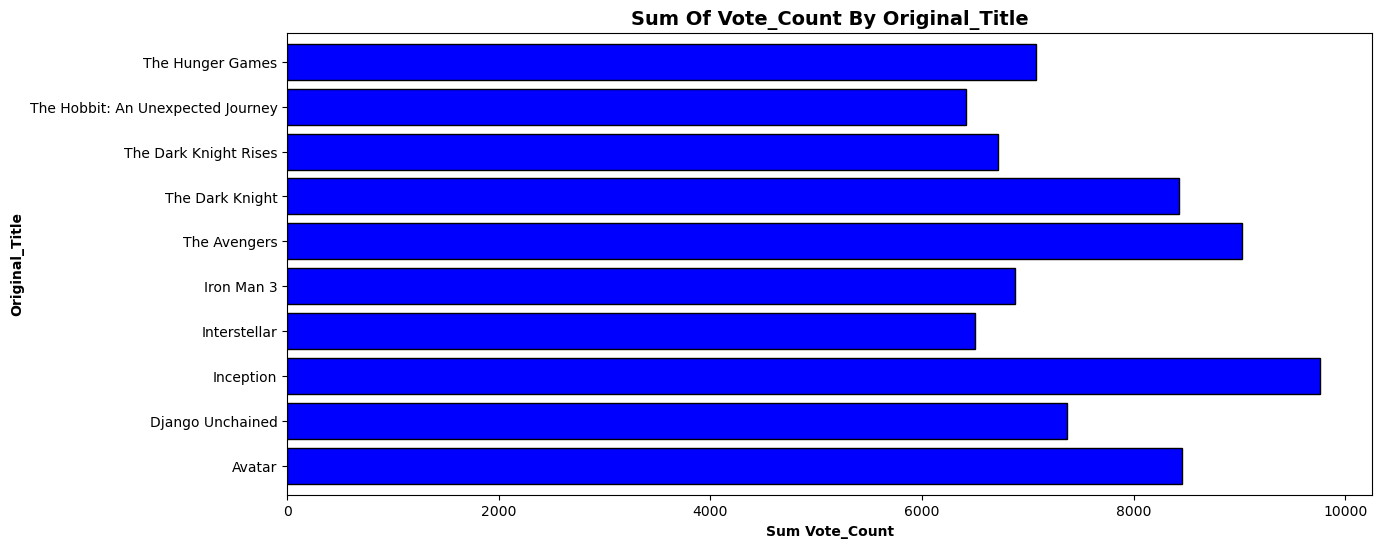

In [14]:
graphPlot(df, 'original_title', 'vote_count', stat='sum')

As from the result, movie **'Inception'** by **'Christopher Nolan'** is the highest voted-movie until now. Coming after are **'The Avengers'**,**'The Dark Knight'** and **'Avatar'** and the range of year that received the highest vote counts of all time started from 2010s going forward. We can tell that those are the years that movie industry actually had a boom throughout the entire globe.

Now, let's check if the highest-vote movie does come along with the highest revenue?

In [24]:
# Check the columns first
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'overview', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'revenue_(\$M)',
       'budget_(\$M)'],
      dtype='object')

In [33]:
# Let's get the top 10 revenue movies
top10_len=df.nlargest(10,'revenue_(\$M)')[['original_title','revenue_(\$M)','release_year','genres']].set_index('original_title')

In [34]:
top10_len

revenue_(\$M)  release_year  \
original_title                                                              
Avatar                                          2781.505847          2009   
Star Wars: The Force Awakens                    2068.178225          2015   
Titanic                                         1845.034188          1997   
The Avengers                                    1519.557910          2012   
Jurassic World                                  1513.528810          2015   
Furious 7                                       1506.249360          2015   
Avengers: Age of Ultron                         1405.035767          2015   
Harry Potter and the Deathly Hallows: Part 2    1327.817822          2011   
Frozen                                          1274.219009          2013   
Iron Man 3                                      1215.439994          2013   

                                                                                 genres  
original_title                                                                           
Avatar                                         Action|Adventure|Fantasy|Science Fiction  
Star Wars: The Force Awakens                   Action|Adventure|Science Fiction|Fantasy  
Titanic                                                          Drama|Romance|Thriller  
The Avengers                                           Science Fiction|Action|Adventure  
Jurassic World                                Action|Adventure|Science Fiction|Thriller  
Furious 7                                                         Action|Crime|Thriller  
Avengers: Age of Ultron                                Action|Adventure|Science Fiction  
Harry Potter and the Deathly Hallows: Part 2                   Adventure|Family|Fantasy  
Frozen                                                       Animation|Adventure|Family  
Iron Man 3                                             Action|Adventure|Science Fiction

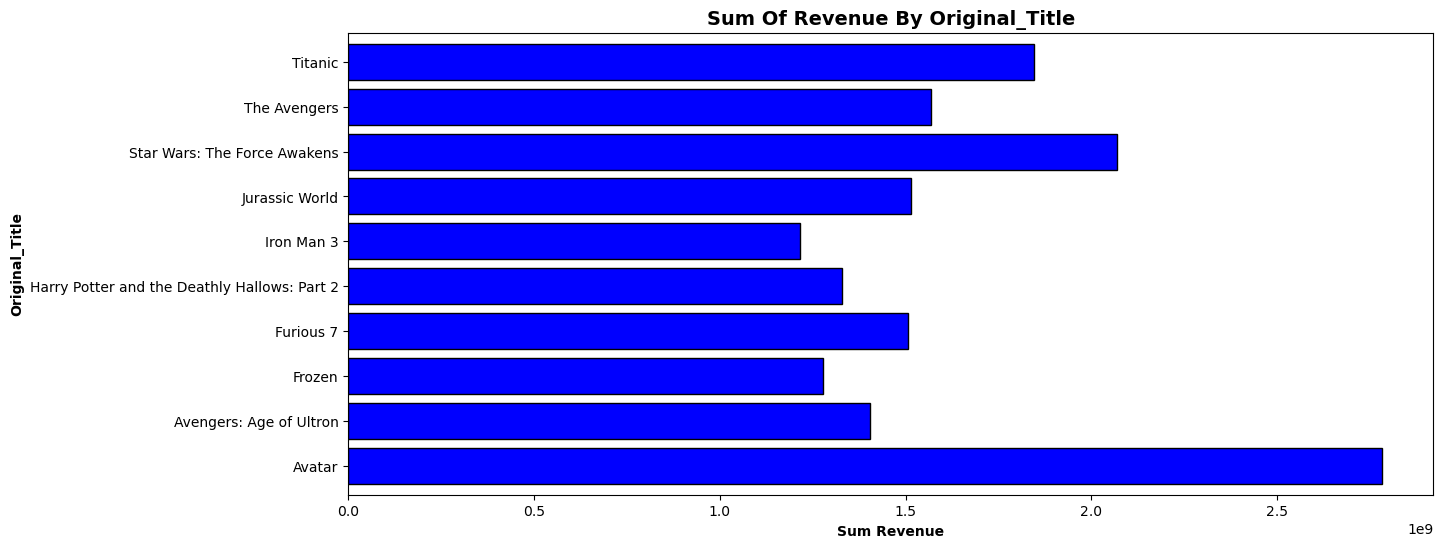

In [21]:
graphPlot(df, 'original_title', 'revenue', stat='sum')

From the result, we can see that the highest revenue movie was **Avatar**, after that it is **Star Wars: The Force Awakens** and **Titanic** was also in the top 10 as well , surprisingly **Inception** was not in the list and the rest of the high-revenue movie were not a very high-voting.

In conclusion: high-voting movie does have a high chance of becoming a profitable movie, but according to the output - some different aspects might have an impact on whether the movie can make a lot of money or not.

### Question 2: How genres make an impact on the polularity of a movie?

We will be looking at the most popular genres over the years. 
One movie will contain multiple genres so we need to separate those genres out and count how many genres a movie likely to have in order to be popular

In [29]:
# Using the str.get_dummies() method to transform categorial data (Genres) into binary values to facilitate analysis.
dg=df['genres'].str.get_dummies(sep='|')

In [30]:
dg1 = dg.sum().reset_index()

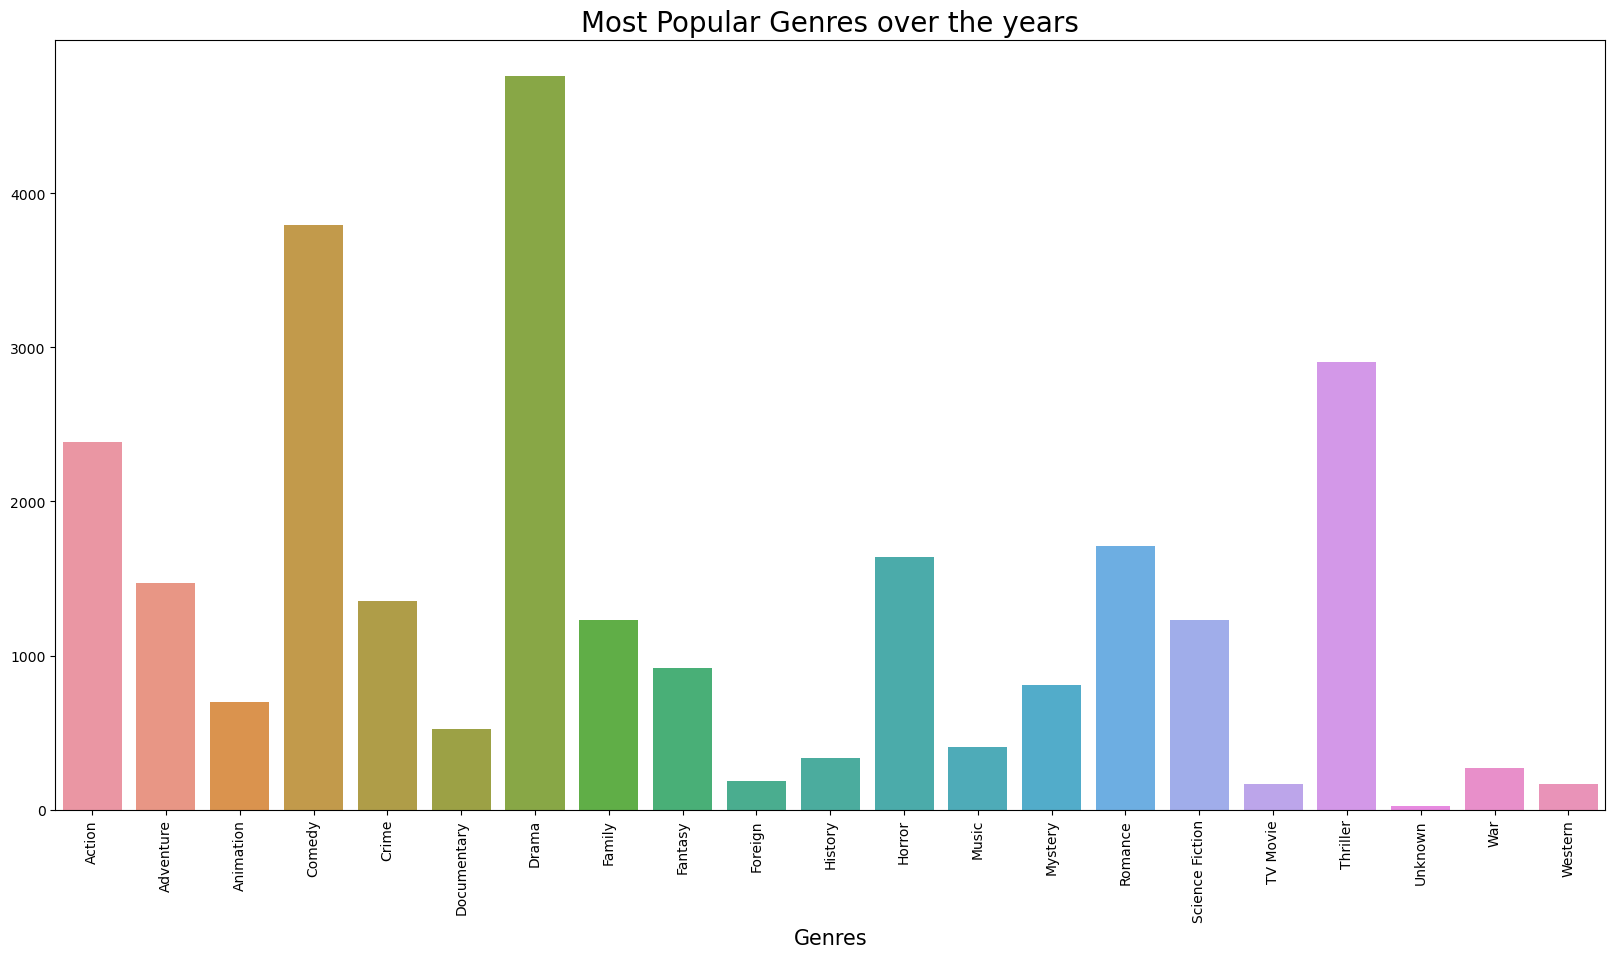

In [31]:
plt.figure(figsize=(20,10))
sns.barplot(x=dg.columns, y=dg.sum(), data = dg1)
plt.title('Most Popular Genres over the years', fontsize = 20)
plt.xlabel('Genres',fontsize = 15)
plt.ylabel('')
plt.xticks(rotation = 90)
plt.show()

From the above graphs, we can see that the most popular movie genres over the years are : Drama, Comedy, Thriller and Action

Baseline from what we've checked from the result in **Question 1**, we can see that genres somehow played an important role in the success of a movie. Majority of movies from Voting and Revenue standpoint revoled around 'Action' and 'Drama' ... An unexpected genre is 'Adventure' is a quite popular one too

<a id='conclusions'></a>
## Conclusions

In conclusion, the analysis of the "tmdb-movies.csv" dataset provided insights into various aspects of movies, including who made the movie (director), revenue, popularity (voting), genres

**Director:** Christopher Nolan	did put in a highlight on why he's the best director in this industry with a very high-voting statistics.

**Revenue:** somehow James Cameroon was on top the list with Avatar, the very first 3D movie in the world - giving him and the crew outstanding revenue and path for the upcoming Avatar 2. Still, revenue is pretty much based on the taste of the audience and tell that not every high-voting movie will be a money-maker one.

**Popularity:** The popularity of movies exhibited variations across genres, with certain genres like action, drama, adventure, consistently garnering higher popularity scores. Popularity was not solely determined by the number of movies released in a specific range, indicating a disparity in popularity among movies.

**Genres:** Different genres showed varying levels of popularity and audience appeal. Some genres had higher average popularity, indicating a broader audience base and stronger interest, while others had lower average popularity, suggesting a more niche or limited audience.

The limitations of the dataset and the influence of other factors should be considered when interpreting the results. Further research can delve into factors affecting revenue, audience preferences, and the evolving landscape of the movie industry to gain a deeper understanding of the dynamics at play.